# E-News Express Project

## Background

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

The design team of the company has created a new landing page. It has to be decide whether the new landing page is more effective to gather new subscribers. Suppose 100 users are randomly selected and divided equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. 

## Objective

To explore the dataset and extract insights using Exploratory Data Analysis. To perform statistical analysis to answer the key questions and provide inferences and recomendations based on all the results.


## Key Questions

1. Do the users spend more time on the new landing page than the old landing page? 
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? 
3. Does the converted status depend on the preferred language? 
4. Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

## Data Description

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

### Import necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # library for probability distributions and statistical functions

In [3]:
data1=pd.read_csv("abtest.csv") # read dataset from the file

In [4]:
# copying data to another varaible to avoid any changes to original data
data=data1 

In [5]:
# looking at head (5 observations) 
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


**Observations**
* The variables group, landing_page, converted and language_preferred are categorical variables.

### Check the shape of the dataset

In [6]:
data.shape

(100, 6)

There are 100 rows and 6 columns

### Check the info()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


## Data Processing

### Summary of data

In [7]:
data.describe() # describing numerical values

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* Mean time spent on a page is 5.37 mintues with a std deviation of 2.37 minutes.
* Minimum time spent on a page is 0.19 minutes and maximum time is 10.7 minutes.

In [9]:
data.describe(exclude='number') # describing non-numeric values

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,new,yes,French
freq,50,50,54,34


**Observations**
* There are only 2 unique values in the variables group, landing_page and converted. 
* The variable language_preferred has 3 unique values.

So these can be considered as Categorical variables


### Fixing the datatypes

In [10]:
# Categorical column should be converted to categorical type 
# (It reduces the data space required to store the dataframe, 
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)

data["group"] = data.group.astype('category')
data["landing_page"] = data.landing_page.astype('category')
data["converted"] = data.converted.astype('category')
data["language_preferred"] = data.language_preferred.astype('category')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


### Check for missing values

In [11]:
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values

# EDA

## Central tendency and Dispersion

#### Central tendency of a variable is a single value to represent the whole list. There are 3 kinds: Mean, Median and Mode

In this case study the only numerical value which can have central tendency and dispersion is time_spent_on_the_page 

In [15]:
data["time_spent_on_the_page"].mean()

5.377800000000002

Mean is the arithmetic average of all observations.

In [16]:
data["time_spent_on_the_page"].median()

5.415

Median is the middle most value in the list after arranging it is ascending order.

In [17]:
data["time_spent_on_the_page"].value_counts()

4.75    2
7.16    2
6.04    2
5.86    2
3.88    2
       ..
4.40    1
0.22    1
5.96    1
3.13    1
5.41    1
Name: time_spent_on_the_page, Length: 94, dtype: int64

Mode is the observation(s) with highest frequency. There can be more than 1 mode to a variable.
Here the observations have a frequency of 2 or 1. Therefore insight of mode is not possible.

## Dispersion

* Range of a variable is the maximum value - minimum value.
* IQR is computed on the middle 50% of observations after eliminating highest and lowest 25%. It is less affected by outliers. 

In [12]:
timerange=data["time_spent_on_the_page"].max()-data["time_spent_on_the_page"].min() # finding range of time_spent_on_the_page

iqrtime=data["time_spent_on_the_page"].quantile(q=0.75)-data["time_spent_on_the_page"].quantile(q=0.25) # finding IQR of 
                                                                                                        # time_spent_on_the_page
print("Range: %.2f"%timerange," minutes")
print("IQR: ",iqrtime," minutes")

Range: 10.52  minutes
IQR:  3.1425  minutes


### Univariate analysis of numerical variables

In [13]:
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, title, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    
    p=sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red').set_title(title) # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="tab10") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.show()
 

### time_spent_on_the_page

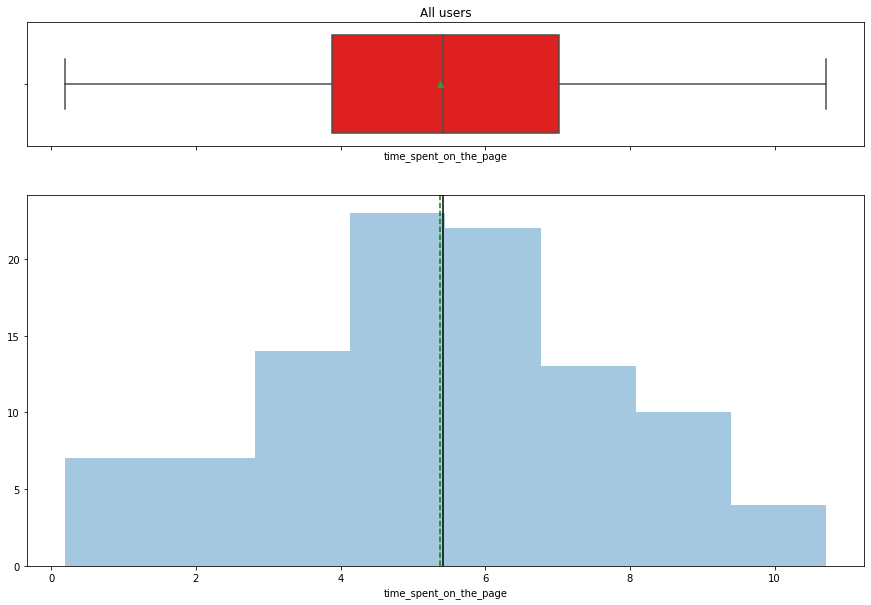

In [21]:
histogram_boxplot(data["time_spent_on_the_page"],"All users")

In [22]:
data["time_spent_on_the_page"].mean()

5.377800000000002

**Observation**

* Mean time spent on a page by all users is 5.37 minutes.

* The plot looks like a normal distribution.

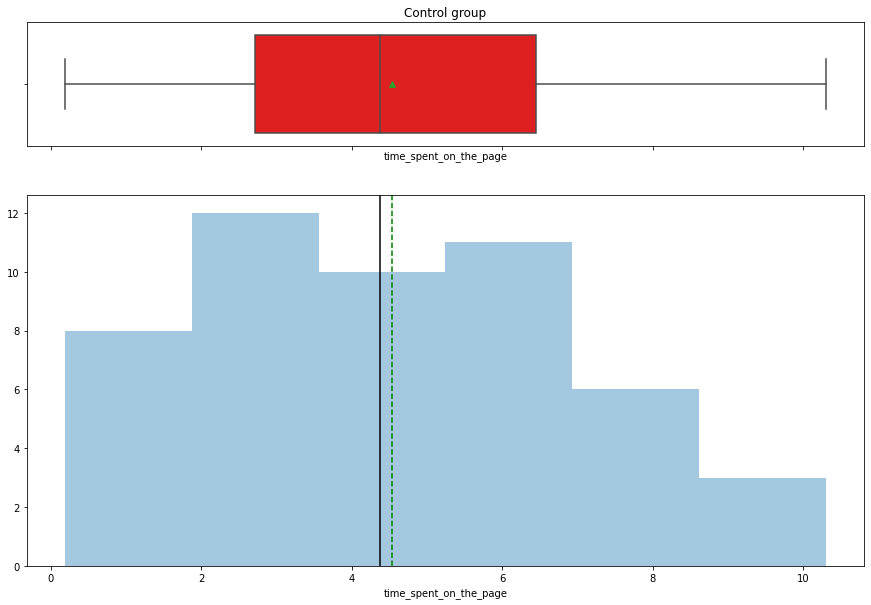

In [52]:
df1=data[(data["landing_page"]=="old")] # dataset of users whose landing page is old (Control group)
histogram_boxplot(df1["time_spent_on_the_page"],"Control group")

In [24]:
df1["time_spent_on_the_page"].mean()

4.532400000000001

**Observation**

* Mean time spent on the old page is 4.53 minutes.

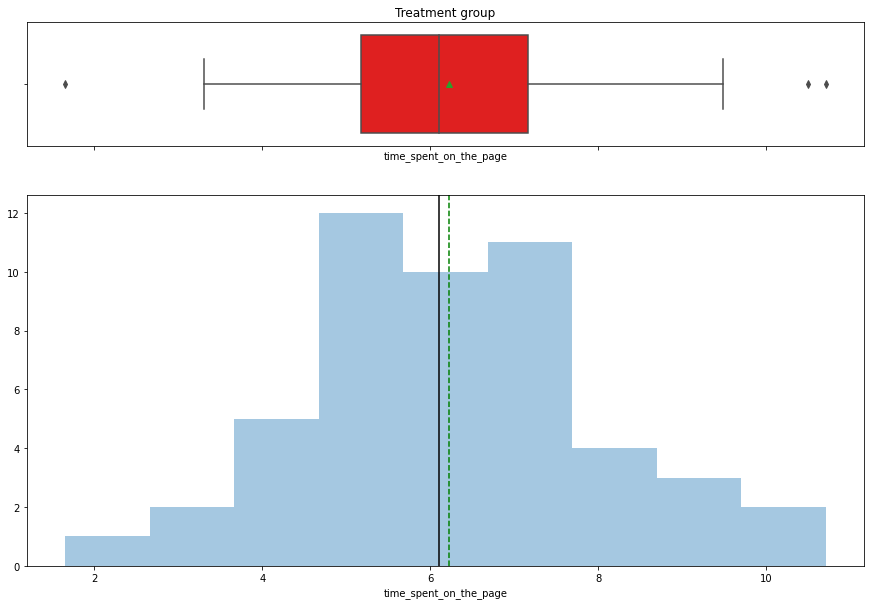

In [55]:
df2=data[(data["landing_page"]=="new")] # dataset of users whose landing page is new (Treatment group)
histogram_boxplot(df2["time_spent_on_the_page"],"Treatment group")

In [26]:
df2["time_spent_on_the_page"].mean()

6.2232

**Observation**

* Mean time spent on new page is 6.22 minutes.

* There are few outliers.


### User_id

In [27]:
data["user_id"].nunique()

100

* All 100 users are unique. This means that there is no overlap in users in the control group and treatment group. Both are independent.

### Univariate analysis on categorical variables

### Group

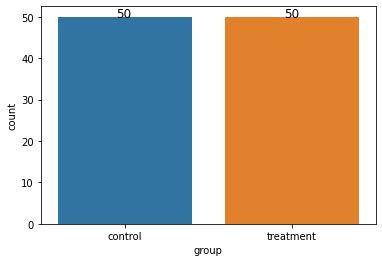

In [14]:
ax=sns.countplot(data["group"],palette="tab10")

total = len(data["group"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate(p.get_height(), (x, y), size = 12) # annotate the count

* There are 50 users each in the control group and treatment group

### Landing_Page

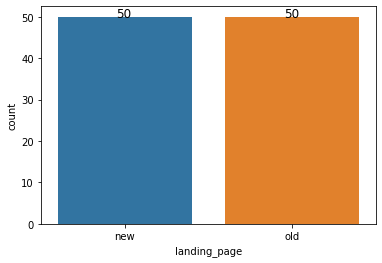

In [29]:
ax=sns.countplot(data["landing_page"],palette="tab10")

total = len(data["landing_page"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate(p.get_height(), (x, y), size = 12) # annotate the count

* 50 users go to the new landing page and other 50 users go to the old landing page

### Converted

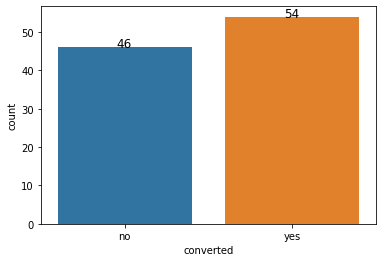

In [8]:
ax=sns.countplot(data["converted"],palette="tab10")

total = len(data["converted"]) # length of the column
for p in ax.patches: # Product:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate(p.get_height(), (x, y), size = 12) # annotate the count

* 54 users have converted to a subscriber of the news portal

### Language_Preferred

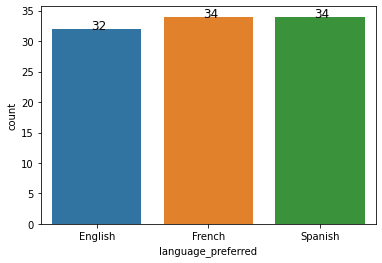

In [53]:
ax=sns.countplot(data["language_preferred"],palette="tab10")

total = len(data["language_preferred"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate(p.get_height(), (x, y), size = 12) # annotate the count

* 32 users prefer English
* 34 users prefer French
* 34 users prefer Spanish


### Bivariate analysis

#### To see how variables depend on each other

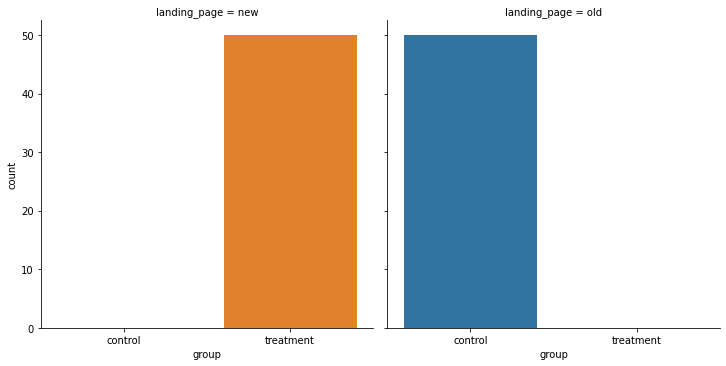

In [32]:
sns.catplot(col="landing_page",x="group",data=data,kind="count",palette="tab10")

**Observations**
* Landing page of Control group is Old
* Landing page of Treatment group is New
* There are 50 users in each category
* The 2 groups are independent

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

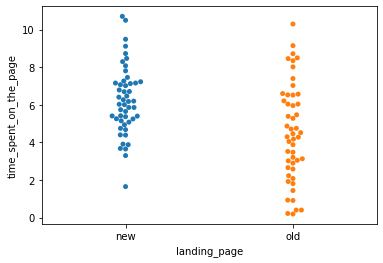

In [34]:
sns.swarmplot(x="landing_page",y="time_spent_on_the_page",data=data,palette="tab10")

* Minimum time spent on the new page is higher than the old page. 

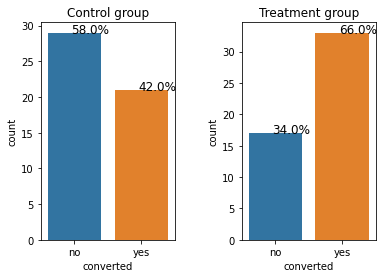

In [56]:
f, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

# number of users converted from the old landing page
ax=sns.countplot(x="converted",data=df1,orient='v' , ax=axes[0],palette="tab10")
ax.set_title("Control group")
total = len(df1["converted"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate('{:.1f}%'.format(round(p.get_height()/total*100,2)), (x, y), size = 12) # annotate the %

# number of users converted from the new landing page
ax=sns.countplot(x="converted",data=df2,orient='v' , ax=axes[1],palette="tab10")
ax.set_title("Treatment group")
total = len(df2["converted"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate('{:.1f}%'.format(round(p.get_height()/total*100,2)), (x, y), size = 12) # annotate the %

**Observations**
* 66% of users who landed in the new page have converted.
* 58% of users who landed in the old page have not converted.

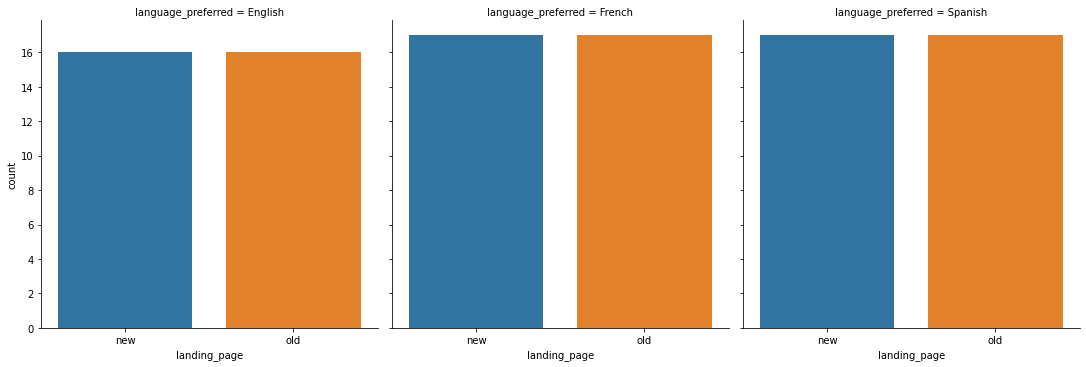

In [36]:
sns.catplot(x="landing_page",col="language_preferred",data=data,kind="count",palette="tab10")

* In each language, there are equal number of users in the old landing page and new landing page.
* In all 3 languages, there is no big difference in the number of users.

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='converted'>

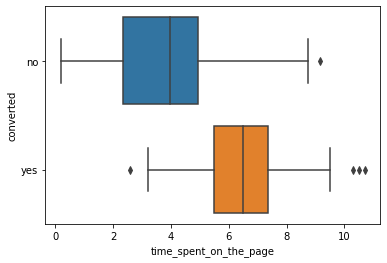

In [37]:
sns.boxplot(x="time_spent_on_the_page",y="converted",data=data,palette="tab10")

In [38]:
data.groupby("converted")["time_spent_on_the_page"].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

* Users who spent more time on the page have converted.

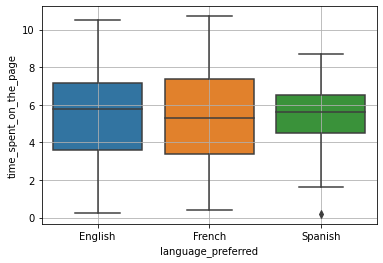

In [39]:
sns.boxplot(y=data["time_spent_on_the_page"],x=data["language_preferred"],palette="tab10")
plt.grid()
plt.show()

* Mean time spent is similar to all languages.
* Range of the time spent is higher in English and French pages.

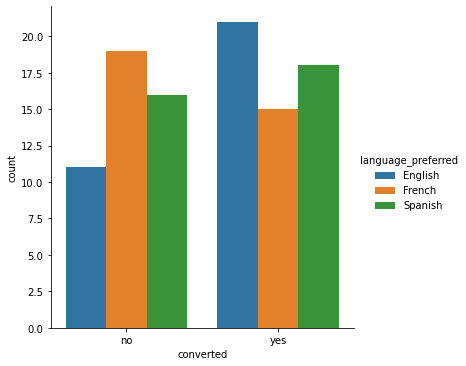

In [40]:
sns.catplot(x="converted",hue="language_preferred",data=data,kind="count",palette="tab10")

* More number of the English users have converted.
* More of the French users have not converted.


### Multivariate Analysis

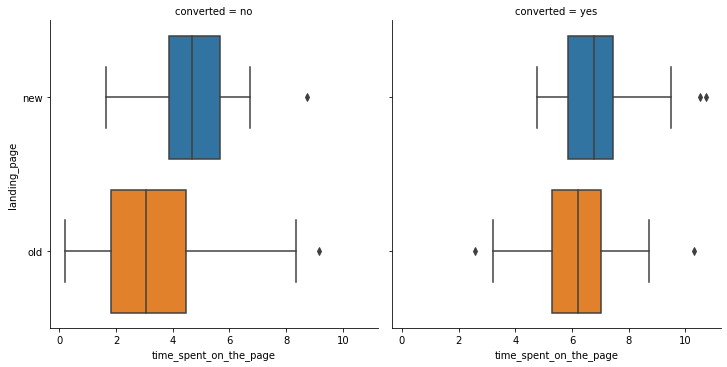

In [41]:
sns.catplot(y="landing_page",col="converted",x="time_spent_on_the_page", data=data,kind="box")

In [42]:
#old page
df1.groupby("converted")["time_spent_on_the_page"].mean()

converted
no     3.34931
yes    6.16619
Name: time_spent_on_the_page, dtype: float64

In [43]:
#new page
df2.groupby("converted")["time_spent_on_the_page"].mean()

converted
no     4.882353
yes    6.913939
Name: time_spent_on_the_page, dtype: float64

**Observations**
* On an average those who have spent more than 6 minutes on the page (in both old/new) have converted.

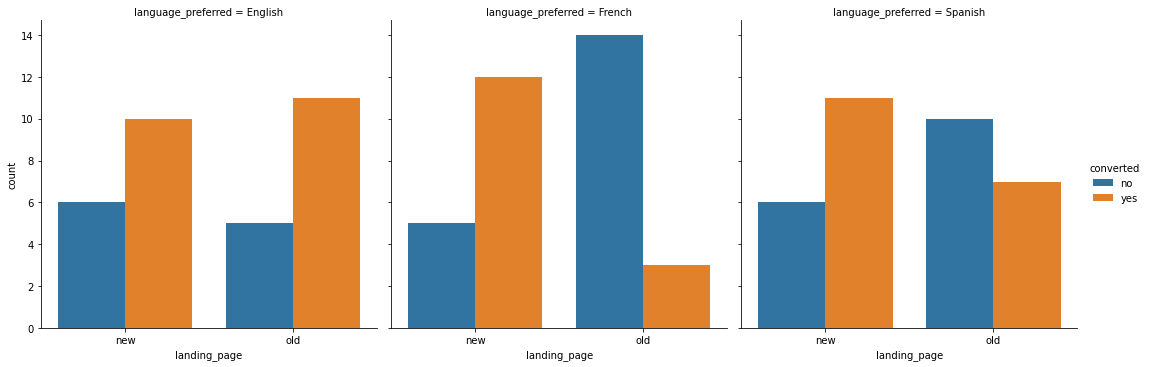

In [44]:
sns.catplot(x="landing_page",hue="converted",col="language_preferred",data=data,kind="count")

**Observations**
* In Spanish users, more from the new landing page have converted and some from the old landing page have converted. This means that the new page is slightly better than the old page.
* In English users almost same number of users in old and new landing pages have converted. This means that in both old and new pages, the content and usability has been good.
* In French users, most of them from new landing page have converted and most of them from the old landing page have not converted. This means that the old page was not very attractive/useful to the users, thats why most of them did not convert. It also shows that the new page is much better than the old and thats why most of them converted. 

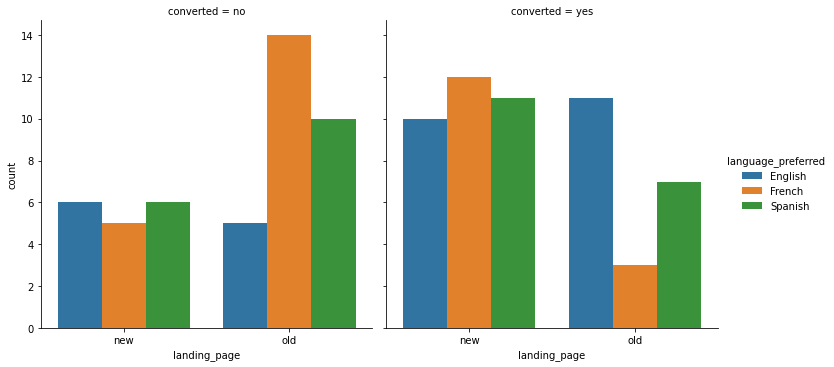

In [31]:
sns.catplot(col="converted",x="landing_page",hue="language_preferred",data=data,kind="count",palette="tab10")

**Observations**
* Most preferred language for those who have converted from new page is French.
* Most preferred language for those who have converted from old page is English.

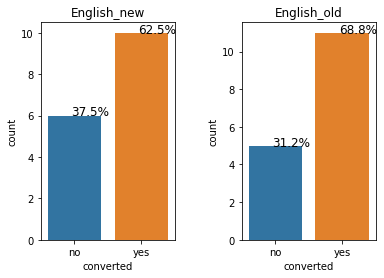

In [49]:
# Conversion based on English language
f, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

df_eng_new=data[(data["language_preferred"]=="English") & (data["landing_page"]=="new")]
ax=sns.countplot(x="converted",data=df_eng_new,palette="tab10",ax=axes[0])
ax.set_title("English_new")
total = len(df_eng_new["converted"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate('{:.1f}%'.format(round(p.get_height()/total*100,2)), (x, y), size = 12) # annotate the %
    
df_eng_old=data[(data["language_preferred"]=="English") & (data["landing_page"]=="old")]
ax=sns.countplot(x="converted",data=df_eng_old,palette="tab10",ax=axes[1])
ax.set_title("English_old")
total = len(df_eng_old["converted"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate('{:.1f}%'.format(round(p.get_height()/total*100,2)), (x, y), size = 12) # annotate the %

* More than 60% of users have converted in both old and new pages
* This shows that there has been very small change in the content from old to new pages and both the content are very good too.

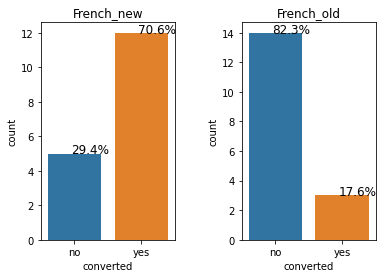

In [50]:
#Conversion based on French language
f, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

df_french_new=data[(data["language_preferred"]=="French") & (data["landing_page"]=="new")]
ax=sns.countplot(x="converted",data=df_french_new,palette="tab10",ax=axes[0])
ax.set_title("French_new")
total = len(df_french_new["converted"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate('{:.1f}%'.format(round(p.get_height()/total*100,2)), (x, y), size = 12) # annotate the %
    
df_french_old=data[(data["language_preferred"]=="French") & (data["landing_page"]=="old")]
ax=sns.countplot(x="converted",data=df_french_old,palette="tab10",ax=axes[1])
ax.set_title("French_old")
total = len(df_french_old["converted"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate('{:.1f}%'.format(round(p.get_height()/total*100,2)), (x, y), size = 12) # annotate the %

* 70% have converted in the new page an only 17% have converted in the old page.
* This shows that French page has improved a lot.

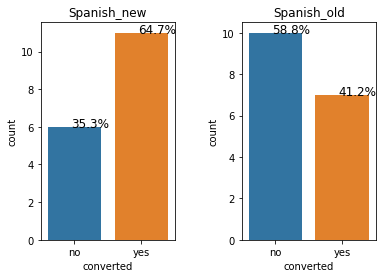

In [57]:
#Conversion based on Spanish language
f, axes = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

df_span_new=data[(data["language_preferred"]=="Spanish") & (data["landing_page"]=="new")]
ax=sns.countplot(x="converted",data=df_span_new,palette="tab10",ax=axes[0])
ax.set_title("Spanish_new")
total = len(df_span_new["converted"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate('{:.1f}%'.format(round(p.get_height()/total*100,2)), (x, y), size = 12) # annotate the %
    
df_span_old=data[(data["language_preferred"]=="Spanish") & (data["landing_page"]=="old")]
ax=sns.countplot(x="converted",data=df_span_old,palette="tab10",ax=axes[1])
ax.set_title("Spanish_old")
total = len(df_span_old["converted"]) # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y = p.get_y() + p.get_height()           # hieght of the plot
    ax.annotate('{:.1f}%'.format(round(p.get_height()/total*100,2)), (x, y), size = 12) # annotate the %

* About 65% have converted from the new page and only 41% have converted from the old page. 
* This shows that there is slight improvement in the content of the new page.

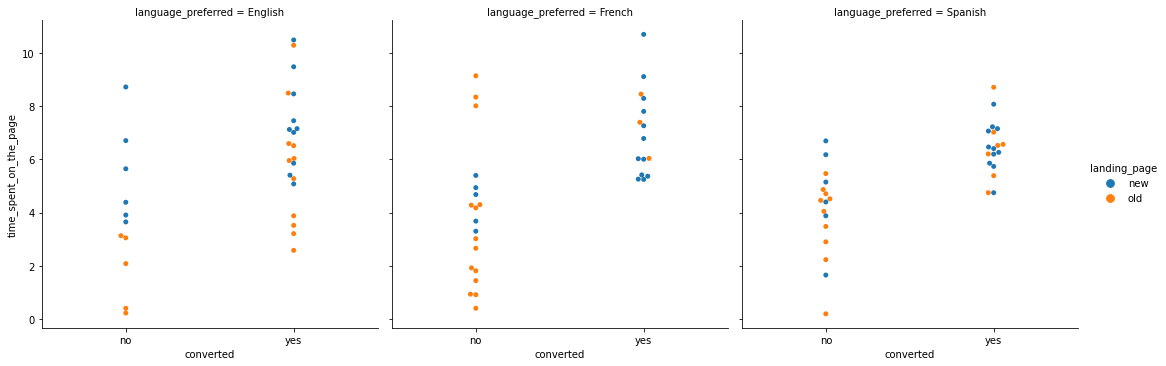

In [46]:
sns.catplot(y="time_spent_on_the_page",hue="landing_page",col="language_preferred",x="converted",data=data,kind="swarm")

**Observations**
* Converted users have spent more time on the page.
* Those who have spent less than 2 minutes have not converted.
* More time is spent on content in English and French than in Spanish language.

### Key insights:

* Mean time spent for different language users is almost same.
* Number of users converted is greater for the new page than that in old landing page.
* Converted users have spent more time on the page than those who did not convert.
* Minimum time spent is more than that in the old page  which means the content of the new page is more interesting to at least skim through before leaving the page.
* The content in French language has improved a lot as most preferred language of converted users is French.
* 54% of users have converted and 46% have not converted.
* Most preferred language for those who have converted is English and not converted is French.
* Least preferred language for those who have converted is French and not converted is English.
* Mean time spent on page by those who have converted is 6.6 minutes and not converted is 3.9 minutes.

Based on Control group:

* 58% of users have converted and 42% have not converted.
* Most preferred language for those who have converted is English (68.8%) and not converted is French (82.3%).
* Least preferred language for those who have converted is French (17.6%) and not converted is English (31.2%).
* Mean time spent on page by those who have converted is 6.1 minutes and not converted is 3.3 minutes.

Based on Treatment group:

* 66% of users have converted and 34% have not converted.
* Most preferred language for those who have converted is French (70.6%) and not converted is English (37.5%).
* Least preferred language for those who have converted is English (62.5%) and not converted is French (29.4%).
* Mean time spent on page by those who have converted is 6.9 minutes and not converted is 4.8 minutes.

### Recommendations:

Even though more than 50% of users have become subscribers, 46% of the users have not converted. To attract more customers and making them want to stay, the following strategies can be implemented:

* Spend more time: To get a feel of the website users need to spend more time on the page. For this the way the content is presented has to look more eye-catchy.  

* Language specific content: Additional content can be added to the page depending on the selected language. Offering news related to the home country of the language will make the users more interested as they get to know the happenings of their home country too.
 
* Refer-a-friend: Current subscribers can recommend the website to their friends and can be offered some benefits if their friends subscribe too. 

* More languages can be introduced to attract users from different backgrounds.




**=========================================================================================================================**

## Hypothesis test to determine if users spend more time on the new landing page than the old landing page

### Step 1: Define Null and Alternate hypothesis
> $H_0:$ Time spent on new landing page is equal to the time spent on old landing page.
>
> $H_a:$ Time spent on new landing page is greater than the time spent on old landing page.
>
> Let $ \mu_1 $ and $ \mu_2 $ be the mean time spent on the new page and mean time spent on the old page respectively.
>
> Mathematically, the above formulated hypotheses can be written as:
>
>  -  $H_0: \mu_1 = \mu_2 $
>
>  -  $H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test
This is a case of a 2-sample independent t-test. The 2 independent samples are new page and old page. We need to calculate the mean times spent for both pages.

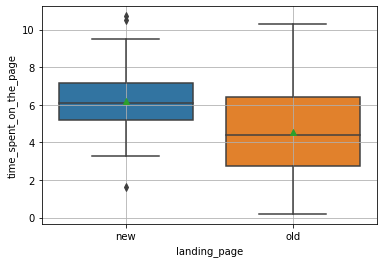

In [136]:
sns.boxplot(x="landing_page",y="time_spent_on_the_page",data=data,showmeans=True)
plt.grid()

**Observations**
* Time spent on the old page ranges from 0 to 10 minutes
* Time spent on the new page ranges from 3 to 10 minutes
* This shows that the new page has content to be read for a minimum of 3 minutes. 

> Mean and median of the time spent on new page is higher than that of old page

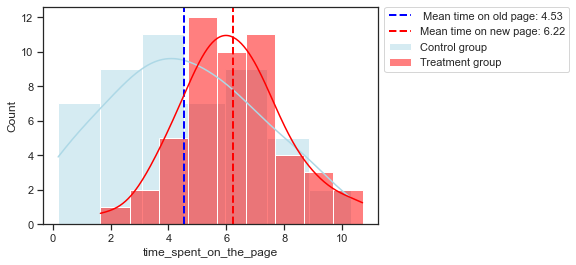

In [194]:
# histplot of time spent on the page by Control group
sns.histplot(df1["time_spent_on_the_page"],color="lightblue",kde=True,label="Control group")
#mean time spent on old page
oldmean=round(df1["time_spent_on_the_page"].mean(),2)
plt.axvline(oldmean,color='blue', linestyle='dashed', linewidth=2,label=" Mean time on old page: " +str(oldmean))

# histplot of time spent on the page by Treatment group
sns.histplot(df2["time_spent_on_the_page"],color="red",kde=True,label="Treatment group")
# mean time spent on new page
newmean=round(df2["time_spent_on_the_page"].mean(),2)
plt.axvline(newmean,color='red', linestyle='dashed', linewidth=2, label="Mean time on new page: "+str(newmean))

# location of legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

* Minimum time spent by treatment group is greater than time spent by control group.
* Maximum time spent by both groups is very similar
* Mean time spent on the new page by the treatment group is higher than the mean time spent on the old page by the control group

In [47]:
print("Mean time spent on old page: %.2f" % df1["time_spent_on_the_page"].mean(),"minutes")
print("The standard deviation of time spent on old page: %.2f" % df1["time_spent_on_the_page"].std())

print("\nMean time spent on new page: %.2f" % df2["time_spent_on_the_page"].mean(), "minutes")
print("The standard deviation of time spent on new page: %.2f" % df2["time_spent_on_the_page"].std())


Mean time spent on old page: 4.53 minutes
The standard deviation of time spent on old page: 2.58

Mean time spent on new page: 6.22 minutes
The standard deviation of time spent on new page: 1.82


### Test for assumptions for T-test 

We have to test the normality of both distributions and homogenity of variance

### Shapiro-Wilk’s test to test normality of Control group

We will test the null hypothesis

>$H_0:$ Time spent on the old page follows a normal distribution 

against the alternate hypothesis

>$H_a:$ Time spent on the old page does not follow a normal distribution

In [52]:
# Assumption: Normality of Control group
# import the required function
from scipy import stats
# find the p-value
w, p_value = stats.shapiro(df1['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.45611920952796936


In [53]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.45611920952796936 is greater than the level of significance, we fail to reject the null hypothesis.


Therefore we can conclude that Control group's distrbution is normal.

### Shapiro-Wilk’s test to test normality of Treatment group

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution 

against the alternate hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [54]:
# Assumption: Normality of Treatment group
# import the required function
from scipy import stats
# find the p-value
w, p_value = stats.shapiro(df2['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [55]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


Therefore we can conclude that Control group's distrbution is normal.



### Levene’s test of Homogeneity of variance

We will test the null hypothesis

>$H_0$: Population variance of Treatment group is equal population variance of Control group

against the alternative hypothesis

>$H_a$: Population variance of Treatment group is not equal to population variance of Control group

In [56]:
#Assumption: Homogeneity of Variance
from scipy.stats import levene
statistic, p_value = levene( df1['time_spent_on_the_page'],df2['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.008950671168914447


In [57]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008950671168914447 is less than the level of significance, we reject the null hypothesis.


Therefore we can conclude that Control group and treatment group have unequal variances.



* Continuous data - Yes, the usage time is measured on a continuous scale.
* Normally distributed populations - Shapiro-Wilk’s test has shown that both groups have normal distribution.
* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* Unequal population standard deviations - Levene’s test has shown that both populations have different variances.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.





### Step 3: Decide the significance level
As given in the problem statement, we select α = 0.05.

### Step 4: Calculate the p-value
scipy.stats.ttest_ind calculates the t-test on sample means from 2 populations. This function returns the test statistic and p-value for a right-tailed t-test as the alternative parameter is set to 'greater'.

In [58]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df2['time_spent_on_the_page'], df1['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ' + str(p_value))

The p-value is 0.0001392381225166549


### Step 5: Compare the p-value with $\alpha$

In [59]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 6: Inference

At the 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that time spent on new landing page is greater than the time spent on old landing page.

**=========================================================================================================================**

## Hypothesis test to determine if conversion rate is greater for new page

### Step 1: Define Null and Alternate hypothesis
> $H_0:$ Conversion rate for new page is equal to conversion rate for old page.
>
> $H_a:$ Conversion rate for new page is greater than conversion rate for old page.
>
> Let $p_1$ and $p_2$ be the conversion rate for the new page and the conversion rate for the old page respectively.
>
> Mathematically, the above formulated hypotheses can be written as:
>
>  -  $H_0: p_1 = p_2 $
>
>  -  $H_a: p_1 > p_2 $

### Step 2: Select Appropriate test
This is a case of a 2-sample Z test. The 2 samples are new page and old page. We need to calculate the conversion rate for both pages.

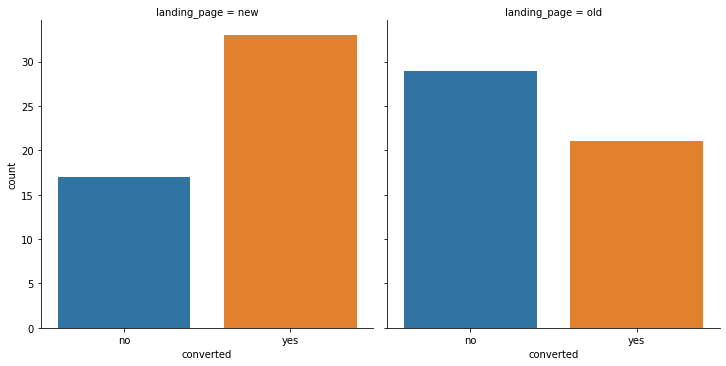

In [60]:
sns.catplot(col="landing_page",x="converted",data=data,kind="count")

In [61]:
n=0
tot=0
for i in df1["converted"]:
    if i=="yes":
        n=n+1
    tot=tot+1
print(n,"users from the control group converted. ")
print("Conversion rate:",n/tot)

k=0
total=0
for i in df2["converted"]:
    if i=="yes":
        k=k+1
    total=total+1
print("\n",k,"users from the treatment group converted. ")
print("Conversion rate:",k/total)

21 users from the control group converted. 
Conversion rate: 0.42

 33 users from the treatment group converted. 
Conversion rate: 0.66


### Test for assumptions for Z-test

*   Binomally distributed population - Yes, a user has either converted or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} = 29\geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $


### Step 3: Decide the significance level
As given in the problem statement, we select α = 0.05.

### Step 4: Calculate the p-value
statsmodels.stats.proportion.proportions_ztest calculates the z-test on sample proportions from 2 populations. This function returns the test statistic and p-value for a right-tailed z-test in case the alternative parameter is set to 'greater'.

In [62]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
converted_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs,alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 5: Compare the p-value with $\alpha$

In [63]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 6: Inference

At the 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the conversion rate for new page is greater than conversion rate for old page.

**=========================================================================================================================**

## Hypothesis test to check if  converted status depends on the preferred language

### Step 1: Define Null and Alternate hypothesis
> $H_0:$ Converted status depends on preferred language.
>
> $H_a:$ Converted status doesn't depend on preferred language.


### Step 2: Select appropriate test

This is a case of Chi-Square test of Independence

### Test for assumptions for Chi-Square test of independence

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 3: Decide the significance level
As given in the problem statement, we select α = 0.05.

### Step 4: Calculate the p-value
scipy.stats.chi2_contingency checks whether the categorical variables from a population are independent. This function returns chi-test statistic, p_value, dof-degrees of freedom, expected frequencies

We first need to form a contingency table.

In [64]:
table=pd.crosstab(data.converted,data.language_preferred) # contingency table with preferred language and converted status
table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


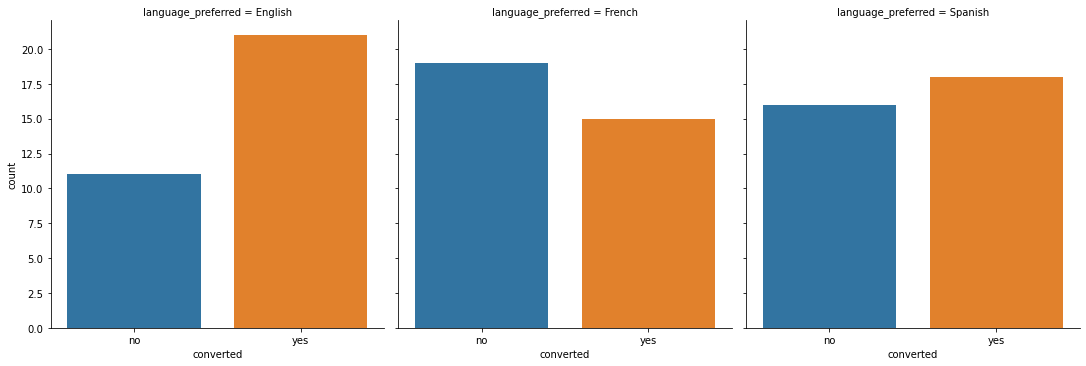

In [65]:
sns.catplot(x="converted",col="language_preferred",data=data,kind="count")

In [66]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 5: Compare the p-value with $\alpha$

In [67]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 6: Inference

At the 5% significance level, we fail to reject the null hypothesis. Hence we have enough statistical evidence to say that the converted status depends on the preferred language. 

**=========================================================================================================================**

## Hypothesis test to determine if the mean time spent on the new page is same for the different language users

### Step 1: Define Null and Alternate hypothesis
Let $\mu_1, \mu_2, \mu_3$ be the mean times spent on the new page by different language users
> $H_0: \mu_1 = \mu_2 = \mu_3$
>
> $H_a: $ Mean time spent on the new page is different for atleast 1 language users. 

### Step 2: Select appropriate test

This is a case of ANOVA test as the samples are from 3 independent populations

### Test assumptions for ANOVA test

The normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test to test normailty of Control group

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution 

against the alternate hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [68]:
# Assumption 1: Normality
# import the required function
from scipy import stats
# find the p-value
w, p_value = stats.shapiro(df2['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [69]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


Therefore we can conclude that Control group follows normal distribution.

### Levene’s test to test for equality of variance of different language users

We will test the null hypothesis

>$H_0$: Population variances of all language users are equal

against the alternative hypothesis

>$H_a$: Population variances of atleast one language user is different from the rest

In [70]:
#Assumption 2: Homogeneity of Variance
#import the required function
df3=data[(data["landing_page"]=="new")]
from scipy.stats import levene
statistic, p_value = levene( df3['time_spent_on_the_page'][df3['language_preferred']=="English"], 
                                   df3['time_spent_on_the_page'][df3['language_preferred']=="French"], 
                                   df3['time_spent_on_the_page'][df3['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [71]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


Therefore we can conclude that Population variances of all language users are equal

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

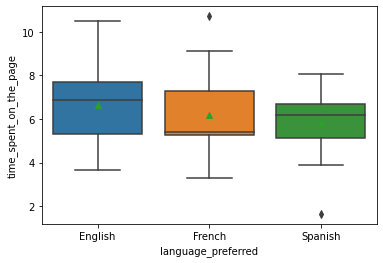

In [72]:
# mean time spent on the new page for different language users
print(df2.groupby("language_preferred")["time_spent_on_the_page"].mean())

sns.boxplot(x="language_preferred",y="time_spent_on_the_page", showmeans=True, data=df3)

### Step 3: Decide the significance level
As given in the problem statement, we select α = 0.05.

### Step 4: Calculate the p-value
scipy.stats.f_oneway compares the samples from 2 or more populations. 

In [73]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df3.loc[df2['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df3.loc[df2['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df3.loc[df2['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 5: Compare the p-value with $\alpha$

In [74]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 6: Inference

At the 5% significance level, we fail to reject the null hypothesis. Hence we have enough statistical evidence to say that the mean time spent on the new page is the same for different language users.

**=========================================================================================================================**

## Conclusion

### Key insights

* Time spent on the page follows Normal Distribution.
* Mean time spent on the new page and mean time spent on the old page have unequal variances.
* Mean time spent on the new page by different language users have equal population variances.
* Time spent on new landing page is greater than the time spent on old landing page.
* Conversion rate for new page is greater than conversion rate for old page.
* Language plays an important role in the converted status.
* Mean time spent on the new page is same for the different language users.
* It is definitely better than the old page with respect to the content of the page in different languages and conversion ratios.
* From EDA and the above results we can conclude that the New landing page is a success with some room for more improvement. 


### Recommendations

To increase the number of subscribers, the following strategies can be considered:

1. Improve content: For the content to look interesting and also be engaging, some factors to be considered are:  
    * Visuals: Apart from interesting news, the Visual content is very important to make a reader to stay and make them wanting to know more. Nowadays people are always in a hurry and want everything to be given right to their face. Our brain processes visual information 60,000 times faster than texts. Therefore, other than just text, there can be more visuals like pictures, graphs/charts, illustrations related to the news.
    * Fun: Everyone loves a good sense of humor. Adding comics and memes related to the news content will make the page look more interesting.
    * Interactive: Users being able to comment and discuss the news article will make them visit more often to check for responses. Just like a physical newspaper, having crossword puzzles and sudoku to solve will keep them more engaged. Having weekly/monthly contests regarding Entertainment sections will keep the users more interested to renew their membership also. 


2. Advertise: To make people aware of the E-News portal, social media platforms can be used to advertise and gain publicity. Contest winners, new promotion plans, illustrations/comic strips related to the current happening topics can also be posted.


3. Promotional plans: Introduce offers to existing subscribers and discounts to new subscribers. Offer coupons to famous restaurants to those subscribers who refer a friend.


4. Suggestions: News articles can be suggested based on the user’s read/watched content. This will make them keep going on from one article to another and hence have a higher chance to become a subscriber.





### Further Analysis

With more details like the categories of news articles in the old and new pages, activity record of the users while accessing the page, time spent on each activity and more such information about the content of the old and new pages will give more scope for data analysis and statistical analysis of data which will help to give more targeted ideas to help gain more subscribers.
